<a href="https://colab.research.google.com/github/miloszpiechota/AI-Systems/blob/main/iris_nn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


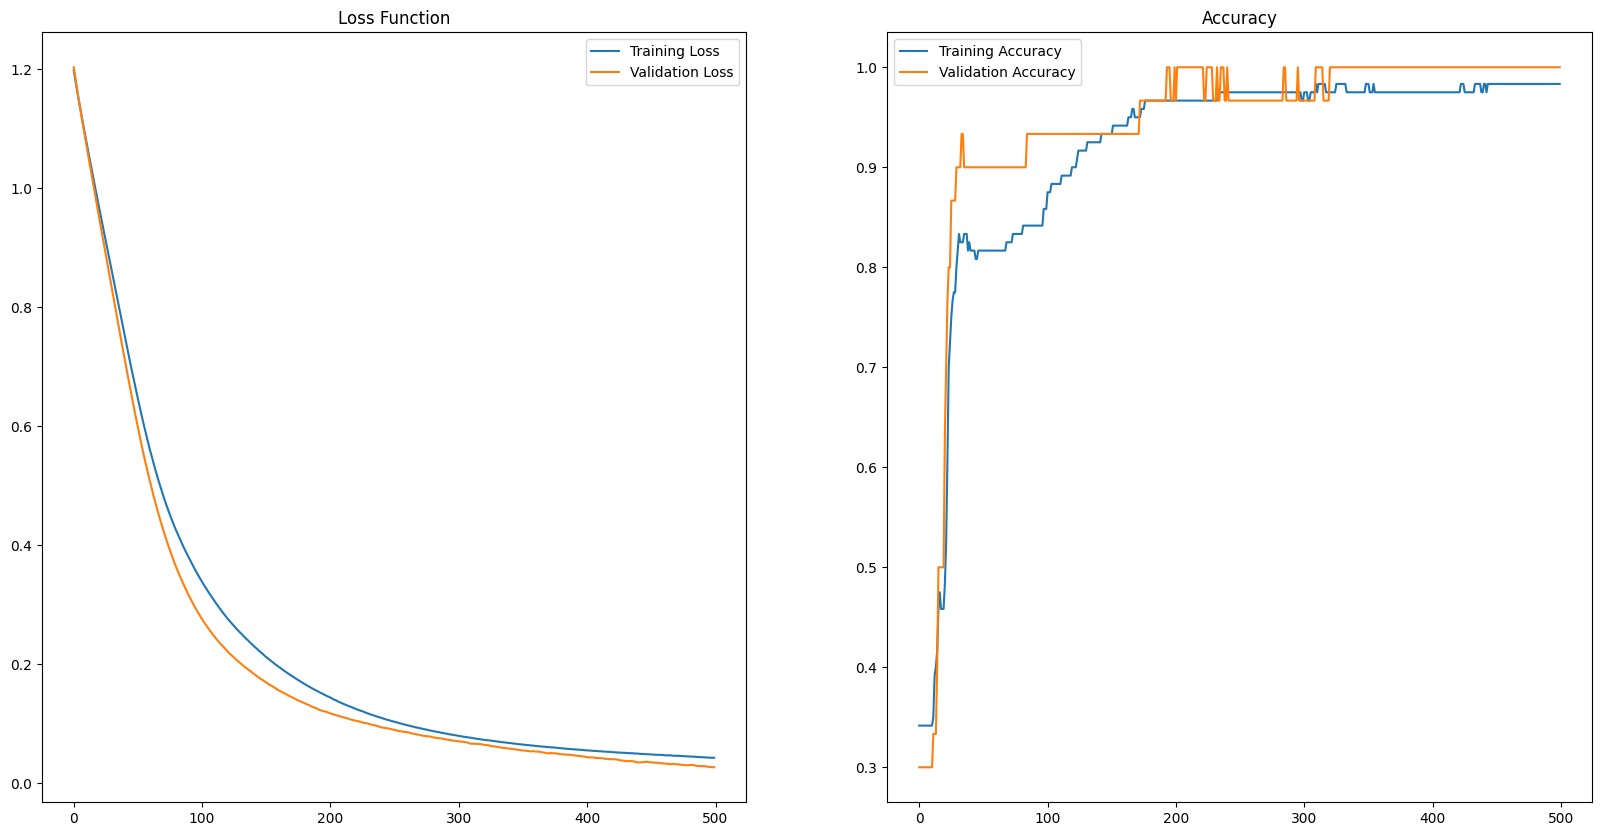

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Accuracy before cross-validation: 1.0000
Average accuracy after cross-validation: 0.9167


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

# Load Iris dataset
data = load_iris()
X = data.data  # Features: petal and sepal width, length, etc.
y = data.target  # Labels: Iris species

# Convert labels to binary format (one-hot encoding)
y = to_categorical(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build neural network model
def build_model():
    model = Sequential()
    model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(y.shape[1], activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train model
model = build_model()
history = model.fit(X_train, y_train, batch_size=32, epochs=500, validation_data=(X_test, y_test), verbose=0)

# Plot loss function and accuracy
floss_train = history.history['loss']
floss_test = history.history['val_loss']
acc_train = history.history['accuracy']
acc_test = history.history['val_accuracy']

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
epochs = np.arange(0, 500)
ax[0].plot(epochs, floss_train, label='Training Loss')
ax[0].plot(epochs, floss_test, label='Validation Loss')
ax[0].set_title('Loss Function')
ax[0].legend()
ax[1].set_title('Accuracy')
ax[1].plot(epochs, acc_train, label='Training Accuracy')
ax[1].plot(epochs, acc_test, label='Validation Accuracy')
ax[1].legend()
plt.show()

# Cross-validation
kf = KFold(n_splits=5)
accs = []
for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
    model_cv = build_model()
    model_cv.fit(X_train_cv, y_train_cv, batch_size=32, epochs=500, verbose=0)
    y_pred = np.argmax(model_cv.predict(X_test_cv), axis=1)
    y_true = np.argmax(y_test_cv, axis=1)
    accs.append(accuracy_score(y_true, y_pred))

# Evaluate model before cross-validation
initial_loss, initial_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy before cross-validation: {initial_acc:.4f}')

print(f'Average accuracy after cross-validation: {np.mean(accs):.4f}')
